In [1]:
import pandas as pd

confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed.head()

C:\Users\luist\AppData\Local\Temp\ipykernel_21372\511605104.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [2]:
confirmed.shape

(289, 1147)

In [3]:
last_date = "3/9/23"
confirmed[last_date]

0      209451
1      334457
2      271496
3       47890
4      105288
        ...  
284    703228
285       535
286     11945
287    343135
288    264276
Name: 3/9/23, Length: 289, dtype: int64

In [4]:
confirmed["Country/Region"]

0               Afghanistan
1                   Albania
2                   Algeria
3                   Andorra
4                    Angola
               ...         
284      West Bank and Gaza
285    Winter Olympics 2022
286                   Yemen
287                  Zambia
288                Zimbabwe
Name: Country/Region, Length: 289, dtype: object

In [5]:
confirmed["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [6]:
confirmed.iloc[0]

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
1/22/20                     0
                     ...     
3/5/23                 209390
3/6/23                 209406
3/7/23                 209436
3/8/23                 209451
3/9/23                 209451
Name: 0, Length: 1147, dtype: object

In [7]:
confirmed.set_index('Province/State').loc["Anhui"]

Country/Region       China
Lat                31.8257
Long              117.2264
1/22/20                  1
1/23/20                  9
                    ...   
3/5/23                2275
3/6/23                2275
3/7/23                2275
3/8/23                2275
3/9/23                2275
Name: Anhui, Length: 1146, dtype: object

In [8]:
confirmed['Country/Region'].value_counts()
# Valor falso pois o erro é muito grande so conseguimos extrair 
# a quantidades de regioes reportadas
# e campo sera descartado pois tem muito campo vazio (muita disparidade no padrao)


Country/Region
China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: count, Length: 201, dtype: int64

In [9]:
confirmed_by_country = confirmed.groupby("Country/Region").sum()
confirmed_by_country.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [10]:
confirmed_by_country.loc['China'][2:]

Long       3688.9377
1/22/20          548
1/23/20          643
1/24/20          920
1/25/20         1406
             ...    
3/5/23       4903524
3/6/23       4903524
3/7/23       4903524
3/8/23       4903524
3/9/23       4903524
Name: China, Length: 1144, dtype: object

Text(0.5, 1.0, 'Casos confirmados na China')

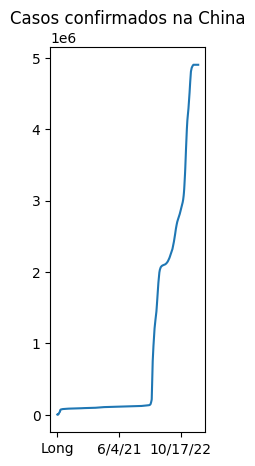

In [11]:
import matplotlib.pyplot as plt

# Extremamente pequeno estamos sendo longe do adequando 
# ao passara msg errada
plt.figure(figsize= (2,5))
confirmed_by_country.loc['China'][2:].plot()
plt.title("Casos confirmados na China")



Text(0.5, 1.0, 'Casos confirmados na China')

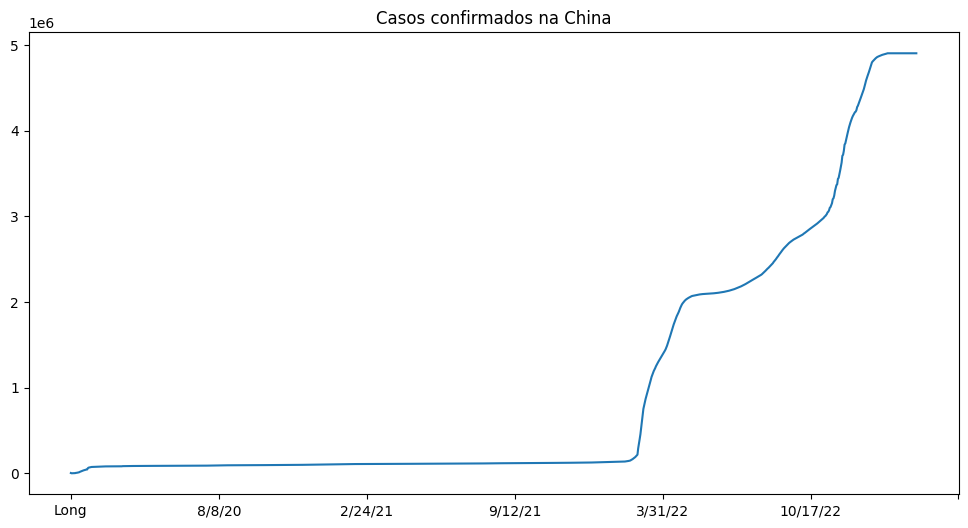

In [12]:
import matplotlib.pyplot as plt

# por isso em data visualization
# e fundamentar estar atentos nos dois exos
plt.figure(figsize= (12,6))
confirmed_by_country.loc['China'][2:].plot()
plt.title("Casos confirmados na China")



(0.0, 300000.0)

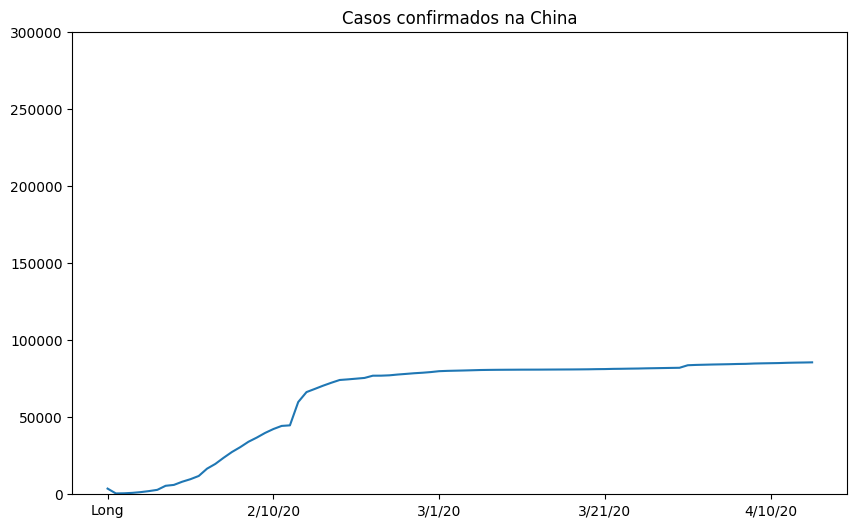

In [13]:
import matplotlib.pyplot as plt

# exemplo rim de manusear o eixo y
plt.figure(figsize= (10,6))
confirmed_by_country.loc['China'][2:88].plot()
plt.title("Casos confirmados na China")
plt.ylim(0, 300000)


<AxesSubplot: >

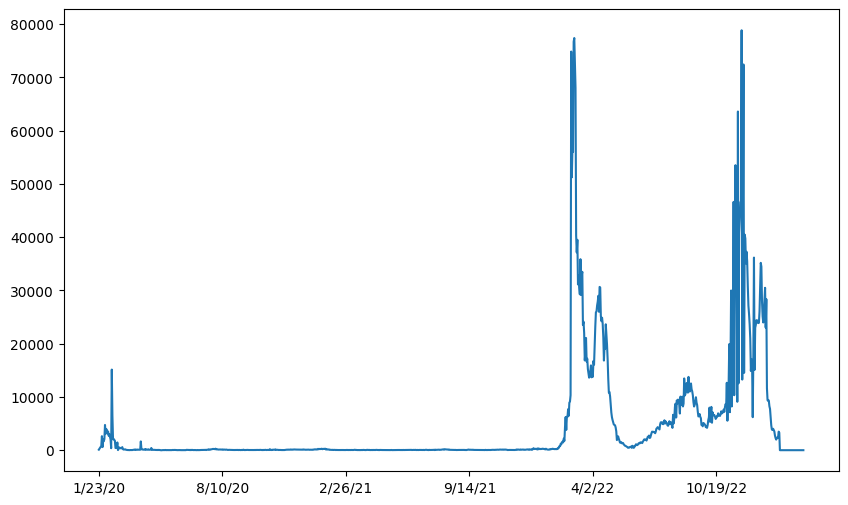

In [14]:
plt.figure(figsize= (10,6))
new_cases_china = confirmed_by_country.loc['China'][3:].diff().dropna()
new_cases_china.plot()

Country/Region
Afghanistan             209451
Albania                 334457
Algeria                 271496
Andorra                  47890
Angola                  105288
                         ...  
West Bank and Gaza      703228
Winter Olympics 2022       535
Yemen                    11945
Zambia                  343135
Zimbabwe                264276
Name: 3/9/23, Length: 201, dtype: int64


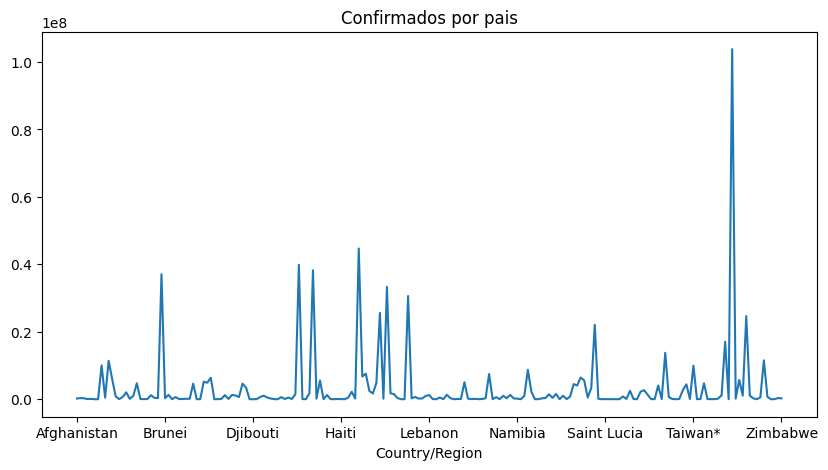

In [15]:
plt.figure(figsize=(10,5))
confirmed_by_country[last_date].plot()
plt.title('Confirmados por pais')

print(confirmed_by_country[last_date])

Text(0.5, 1.0, 'Confirmados por pais')

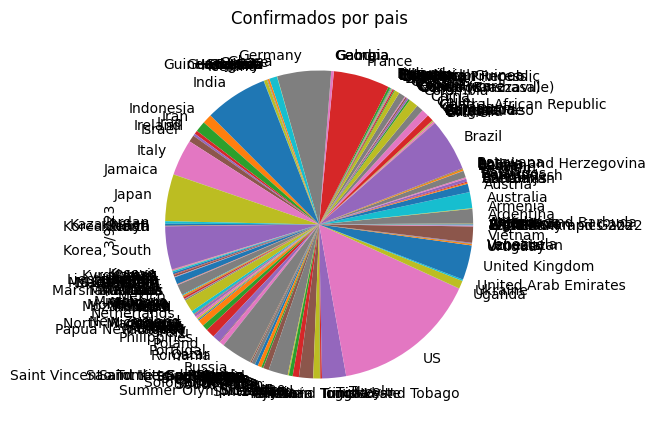

In [16]:
plt.figure(figsize=(10,5))
confirmed_by_country[last_date].plot(kind = 'pie')
plt.title('Confirmados por pais')

Text(0.5, 1.0, 'Confirmados por pais')

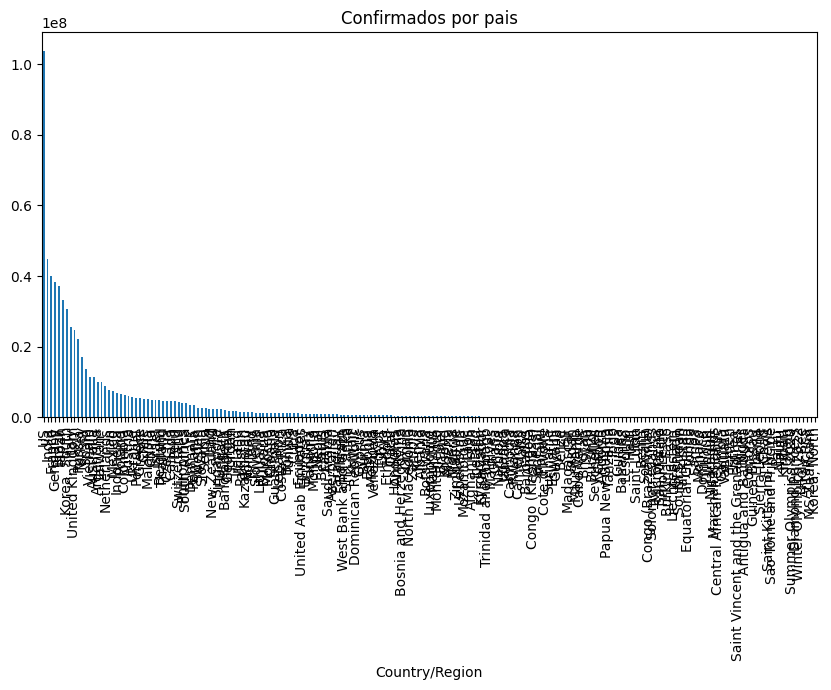

In [17]:
plt.figure(figsize=(10,5))
confirmed_by_country[last_date].sort_values(ascending= False).plot(kind = 'bar')
plt.title('Confirmados por pais')

Text(0.5, 1.0, 'Confirmados por pais')

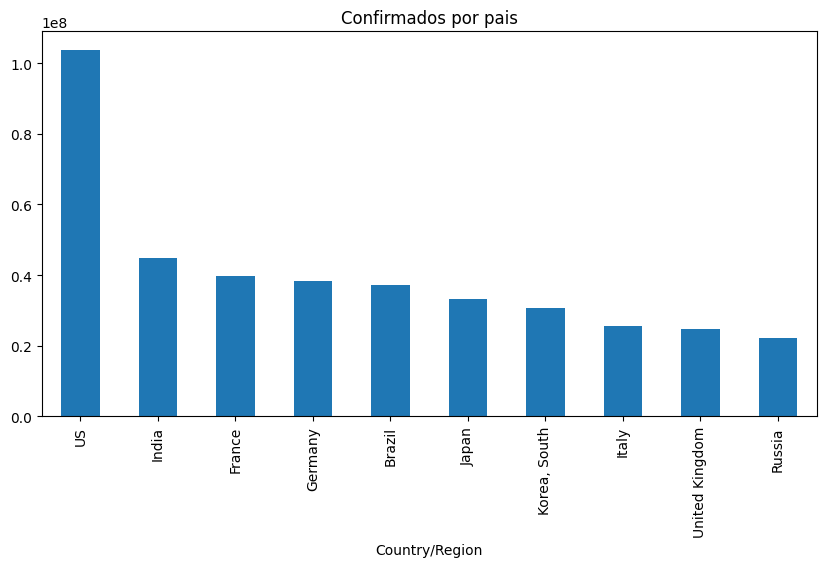

In [18]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].sort_values(ascending= False,)[:10].plot(kind = 'bar')
plt.title('Confirmados por pais')

Text(0.5, 1.0, 'Confirmados por pais')

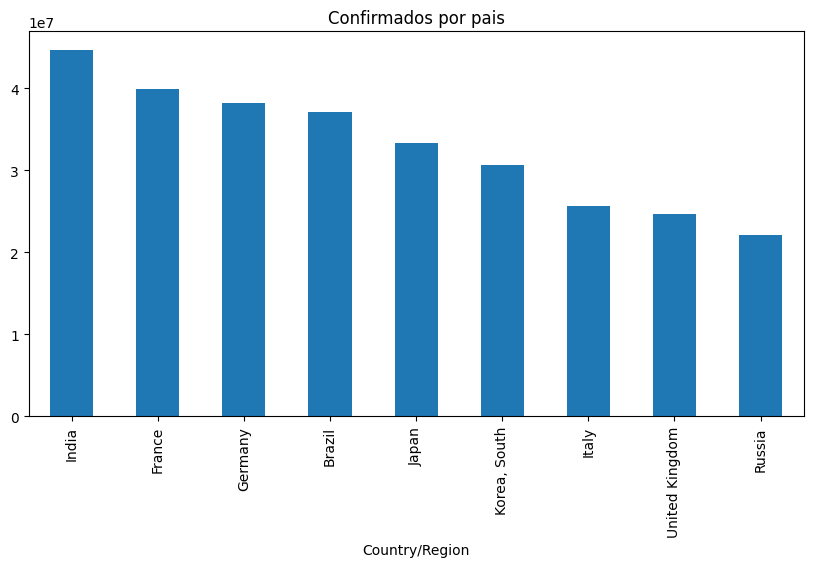

In [19]:
plt.figure(figsize=(10,5))

confirmed_by_country[last_date].sort_values(ascending= False,)[1:10].plot(kind = 'bar')
plt.title('Confirmados por pais')